In [1]:
# Just plot data imported from JANAF.nist.gov, to check for typos
# Reference state of element has EoF = 0 at all temperatures, by definition
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
molec = 'p'
fref = os.sep.join(['refdata', f'{molec}_reference_state.csv'])

In [3]:
dfref = pd.read_csv(fref, sep='\t', comment='#', skiprows=0)

In [4]:
# the last three columns should be all zeros
# Property values are not single-valued at phase transitions
cols = dfref.columns
nz = np.argwhere(dfref[dfref.columns[5::]].to_numpy())
if len(nz):
    print(f'*** Erroneous non-zero values for reference state of "{molec}" ***')
    for irow, icol in nz:
        valstr = str(dfref.iloc[irow, icol+5])
        if valstr == '0.':  # this counts as nonzero
            valstr = 0.
        else:
            print('{:.2f}\t{:<13s}\t{:s}'.format(dfref.iloc[irow, 0], str(cols[icol+5]), valstr))

*** Erroneous non-zero values for reference state of "p" ***
195.40	delta-fH     	ALPHA <--> BETA
195.40	delta-fG     	nan
195.40	logKf        	nan
195.40	delta-fH     	TRANSITION
195.40	delta-fG     	nan
195.40	logKf        	nan
317.30	delta-fH     	BETA <--> LIQUID
317.30	delta-fG     	nan
317.30	logKf        	nan
317.30	delta-fH     	TRANSITION
317.30	delta-fG     	nan
317.30	logKf        	nan
1180.01	delta-fH     	LIQUID <--> IDEAL GAS
1180.01	delta-fG     	nan
1180.01	logKf        	nan
1180.01	delta-fH     	FUGACITY = 1 bar
1180.01	delta-fG     	nan
1180.01	logKf        	nan


In [5]:
# Replace 'INFINITE' with np.inf
dfref.replace('INFINITE', np.inf, inplace=True)
# Replace other strings with NaN
dfref.replace(to_replace='[^\d]+', value=np.nan, regex=True, inplace=True)
print('Setting EoF = 0 at all temperatures')
dfref[dfref.columns[5]] = 0.
dfref

Setting EoF = 0 at all temperatures


,T(K),Cp,S,-[G-H(Tr)]/T,H-H(Tr),delta-fH,delta-fG,logKf
0,0.0,0.000,0.000,inf,-5.360,0.0,0.0,0.0
1,100.0,13.728,17.688,NaN,-4.473,0.0,0.0,0.0
2,195.4,21.117,28.969,NaN,-2.827,0.0,NaN,NaN
3,195.4,20.941,31.637,NaN,-2.306,0.0,NaN,NaN
4,200.0,21.092,32.126,NaN,-2.209,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
58,5200.0,19.272,161.282,NaN,163.914,0.0,0.0,0.0
59,5400.0,19.296,162.010,NaN,167.771,0.0,0.0,0.0
60,5600.0,19.319,162.712,NaN,171.632,0.0,0.0,0.0
61,5800.0,19.342,163.390,NaN,175.498,0.0,0.0,0.0


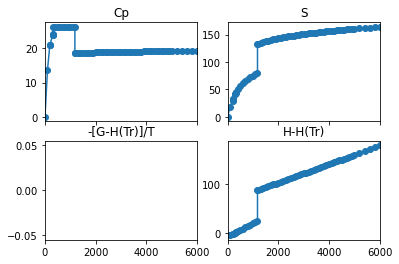

In [6]:
# Plot the other quantities for visual check
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1, ax2, ax3, ax4]
Tmax = 6000.
for titl, ax in zip(cols[1:5], axs):
    ax.set_title(titl)
    ax.plot(dfref[cols[0]], dfref[titl])
    ax.scatter(dfref[cols[0]], dfref[titl])
    ax.set_xlim([0, Tmax])

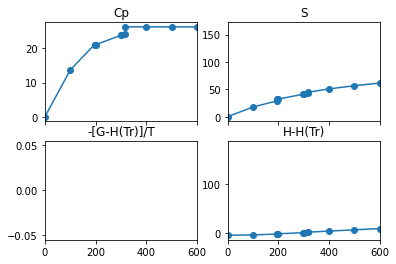

In [7]:
# Plot the other quantities for visual check
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True)
axs = [ax1, ax2, ax3, ax4]
Tmax = 600.
for titl, ax in zip(cols[1:5], axs):
    ax.set_title(titl)
    ax.plot(dfref[cols[0]], dfref[titl])
    ax.scatter(dfref[cols[0]], dfref[titl])
    ax.set_xlim([0, Tmax])